# Loan Data from Prosper
## by Ahmed Harhash

## Investigation Overview

> I am going to explore loan original amount.

## Dataset Overview

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df=pd.read_csv('prosperLoanData.csv')
# remove columns that contain null values
df.dropna(axis=1,inplace=True)

# remove dublicates
df.drop_duplicates(inplace=True)


In [3]:
#remove observations with accounts more than 20
df = df[df.OpenRevolvingAccounts <= 20]
#remove loans with investors more than 250
df = df[df.Investors<=250]

In [4]:
# change all past due to single value
past_due = df[df.LoanStatus.str.contains("Past Due")]
past_due['LoanStatus'] = 'Past Due'

#remove old past due rows
df = df[~df.LoanStatus.str.contains("Past Due",na=False)]

#concat new ones
df = pd.concat([df,past_due],ignore_index=True)

#remove cancelled and final payment
df = df[~df.LoanStatus.str.contains("Cancelled",na=False)]
df = df[~df.LoanStatus.str.contains("FinalPaymentInProgress",na=False)]


## Loans original amount

> Most loans range between 1k to 5k

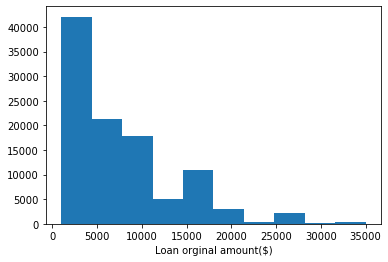

In [5]:
plt.hist(df.LoanOriginalAmount)
plt.xlabel('Loan orginal amount($)')
plt.show()

## Loan original amount VS Term

> Seems logical bigger Loans needs more time 

In [7]:
color = sb.color_palette()[0]

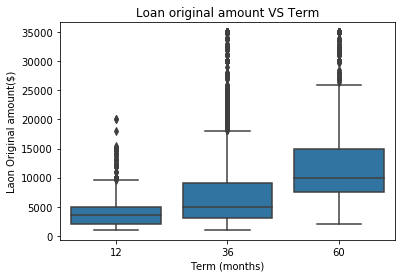

In [8]:
sb.boxplot(x='Term',y="LoanOriginalAmount",data=df,color=color)
plt.xlabel('Term (months)')
plt.ylabel("Laon Original amount($)")
plt.title("Loan original amount VS Term")
plt.show()

## Loan original amount VS Loan status

> Even small loans can be past due \
>The maen of original amount for past due loans is higher than completed

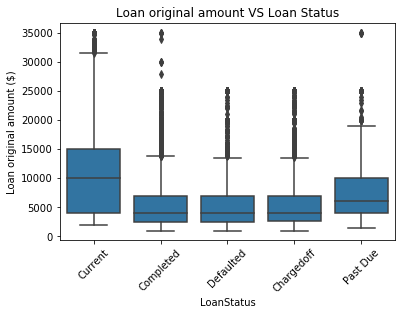

In [9]:
sb.boxplot(x='LoanStatus',y='LoanOriginalAmount',data=df,color=color)
plt.xticks(rotation=45)
plt.ylabel("Loan original amount ($)")
plt.title("Loan original amount VS Loan Status")
plt.show()

## Loan original amount VS Homeowner

> Being Homeowner has higher mean of loan original amount \
If you are Homeowner you can get higher loans

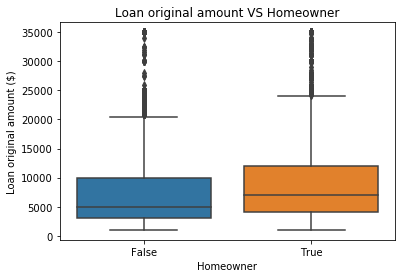

In [10]:
sb.boxplot(x='IsBorrowerHomeowner',y='LoanOriginalAmount',data=df)
plt.xlabel("Homeowner")
plt.ylabel("Loan original amount ($)")
plt.title("Loan original amount VS Homeowner")
plt.show()

## Loan original amount VS Income range

>  Bigger Loan amount could be related to higher income range

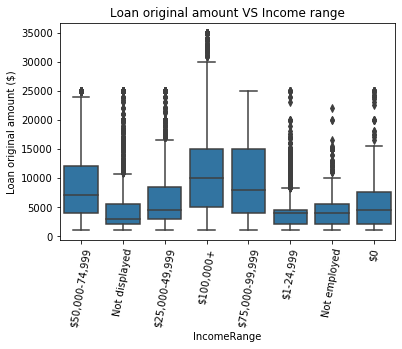

In [11]:
sb.boxplot(x='IncomeRange',y='LoanOriginalAmount',data=df,color=color)
plt.xticks(rotation=80)
plt.ylabel("Loan original amount ($)")
plt.title("Loan original amount VS Income range")
plt.show()

## Homeowner & Income range effect on loan amount
>Being Homeowner helped not employed group and group with 0 income to get higher Loan amount \
Meaning having an asset can gurantee you but that caused 2008 financial crisis



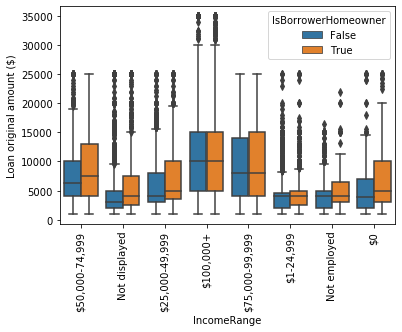

In [12]:
sb.boxplot(data=df,y='LoanOriginalAmount',x='IncomeRange',hue='IsBorrowerHomeowner')
plt.xticks(rotation=90)
plt.ylabel("Loan original amount ($)")
plt.show()

## Homeowner and Loan Term
>Being Homeowner helped to get bigger loan amount in the same term \
Meaning being Homeowner gives you some privilage


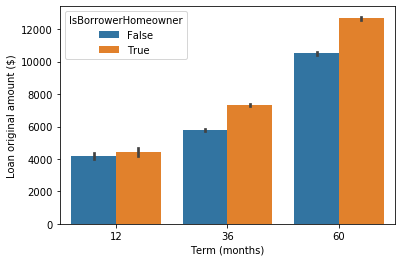

In [13]:
sb.barplot(data=df,y='LoanOriginalAmount',x='Term',hue='IsBorrowerHomeowner')
plt.xlabel('Term (months)')
plt.ylabel("Loan original amount ($)")
plt.show()